In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
data = pd.read_csv("nyt17.csv")
data

,Age,Gender,Impressions,Clicks,Signed_In
0,63,1,2,0,1
1,0,0,7,0,0
2,0,0,8,0,0
3,0,0,4,0,0
4,61,1,6,0,1
...,...,...,...,...,...
445223,0,0,10,0,0
445224,17,0,5,0,1
445225,0,0,8,0,0
445226,0,0,8,0,0


In [120]:
def age_group(age):
    if age == 18:
        return "18"
    elif age > 18 and age <= 24:
        return "18-24"
    elif age >= 25 and age <= 34:
        return "25-34"
    elif age >= 35 and age <= 44:
        return "35-44"
    elif age >= 45 and age <= 54:
        return "45-54"
    elif age >= 55 and age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"

def gender(gender):
    if gender == 0:
        return "Female"
    elif gender == 1:
        return "Male"
    else:
        return "Attack helicopter"

data_valid_age = data[(data.Age > 0)]
data_valid_age

,Age,Gender,Impressions,Clicks,Signed_In
0,63,1,2,0,1
4,61,1,6,0,1
6,60,1,4,0,1
9,49,0,7,0,1
11,41,1,3,0,1
...,...,...,...,...,...
445220,64,1,5,0,1
445221,31,1,4,0,1
445222,59,1,3,1,1
445224,17,0,5,0,1


In [121]:
data_similar_age = data_valid_age
data_similar_age['SimilarAge'] = data_valid_age.Age.apply(lambda age: age_group(age))
data_similar_age = data_valid_age.groupby("SimilarAge", as_index=False).count()
data_similar_age

/tmp/ipykernel_5400/2680089613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_similar_age['SimilarAge'] = data_valid_age.Age.apply(lambda age: age_group(age))


,SimilarAge,Age,Gender,Impressions,Clicks,Signed_In
0,18,4178,4178,4178,4178,4178
1,18-24,27382,27382,27382,27382,27382
2,25-34,44552,44552,44552,44552,44552
3,35-44,53830,53830,53830,53830,53830
4,45-54,48597,48597,48597,48597,48597
5,55-64,34273,34273,34273,34273,34273
6,65+,22104,22104,22104,22104,22104


<AxesSubplot: xlabel='SimilarAge', ylabel='Clicks'>

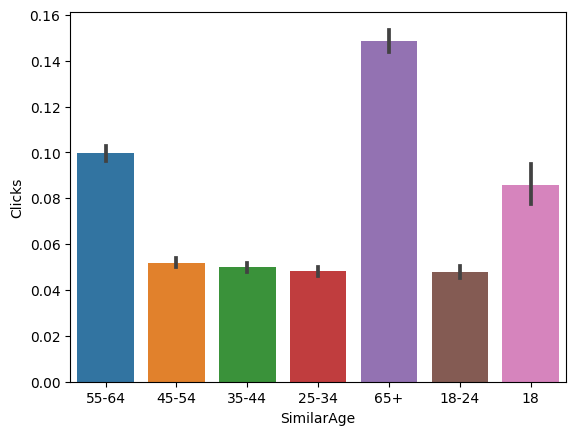

In [122]:
seaborn.barplot(data=data, x=data_valid_age.SimilarAge, y=data_valid_age.Clicks)

<AxesSubplot: xlabel='SimilarAge', ylabel='Signed_In'>

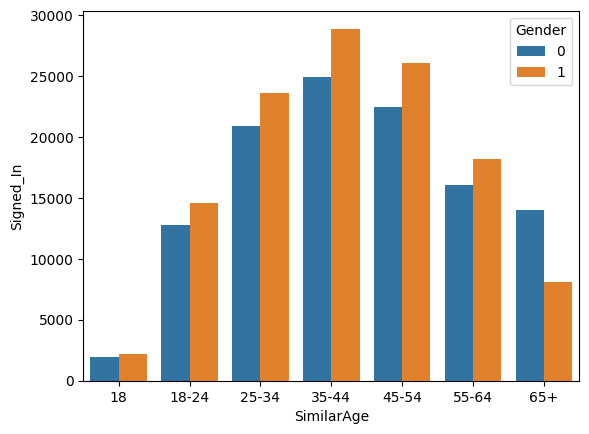

In [123]:
data_signed_in = data_valid_age
data_signed_in = data_valid_age.groupby(["SimilarAge", "Gender"], as_index=False).count()

seaborn.barplot(data=data_signed_in,
               x=data_signed_in.SimilarAge,
               y=data_signed_in.Signed_In,
               hue=data_signed_in.Gender)

In [126]:
data['age_group'] = data['Age'].map(lambda age: age_group(age))
data_grouped_by_age = data.groupby(by=["age_group"], as_index=False).sum()
data_summed = data_grouped_by_age

data_summed['CTR'] = data_grouped_by_age.apply(lambda row: row['Clicks'] / row['Impressions'] * 100, axis=1)
data_summed['Users'] = data.groupby(["age_group"], as_index=False).size()['size']

data_summed


,age_group,Age,Gender,Impressions,Clicks,Signed_In,CTR,Users
0,18,75204,2222,20690,359,4178,1.735138,4178
1,18-24,582441,14581,137306,1312,27382,0.955530,27382
2,25-34,1314750,23638,222614,2147,44552,0.964450,44552
3,35-44,2126486,28907,269045,2684,53830,0.997603,53830
4,45-54,2404916,26104,242310,2527,48597,1.042879,48597
5,55-64,2039422,18235,171066,3415,34273,1.996306,34273
6,65+,1612701,8069,111073,3286,22104,2.958415,22104
